<a href="https://colab.research.google.com/github/Dhanwith03/Dog-Breed-Detection/blob/main/Dog_Breed_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi Class Dog Breed image classification.
Building an end to end multi class image classification using Tensor Flow.

We'll go through each of these in the context of the 6 step machine learning framework:

**Problem defintion -** Use computer vision to classify photos of dogs into different dog breeds.

Data - 20,000+ images of dogs from 120 different dog breeds from the Stanford Dogs dataset.

**Evaluation -** We'd like to beat the original paper's results (22% mean accuracy across all classes, tip: A good way to practice your skills is to find some results online and try to beat them).

**Features -** Because we're using deep learning, our model will learn the features on its own.

**Modelling -** We're going to use a pretrained convolutional neural network (CNN) and transfer learning.

**Experiments -** We'll try different amounts of data with the same model to see the effects on our results.

**Note:** It's okay not to know these exact steps ahead of time. When starting a new project, it's often the case you'll figure it out as you go. These steps are only filled out because I've had practice working on several machine learning projects. You'll pick up these ideas overtime.

In [ ]:
# !unzip "/content/drive/MyDrive/Dog_Breed/dog-breed-identification.zip" -d "/content/drive/MyDrive/Dog_Breed/"

###Getting Workspace ready

In [ ]:
#Import necessary tools into collab
import tensorflow as tf
import tensorflow_hub as hub

print("TF HUB version:",tf.__version__)
print("TF version:",hub.__version__)

#Check for GPU availability
print("GPU","available(YES)" if tf.config.list_physical_devices("GPU") else "GPU not available")

TF HUB version: 2.17.0
TF version: 0.16.1
GPU available(YES)


# Getting our data ready (tunring into tensors)

With all ML models, our data has to be in numerical format.So we will be doing that.

Turning images into Tensors (numerical representation)


In [ ]:
# Checkout the labesl of our data
import pandas as pd
labels_csv=pd.read_csv("/content/drive/MyDrive/Dog_Breed/labels.csv")

print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head() #skip

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

<Axes: xlabel='breed'>

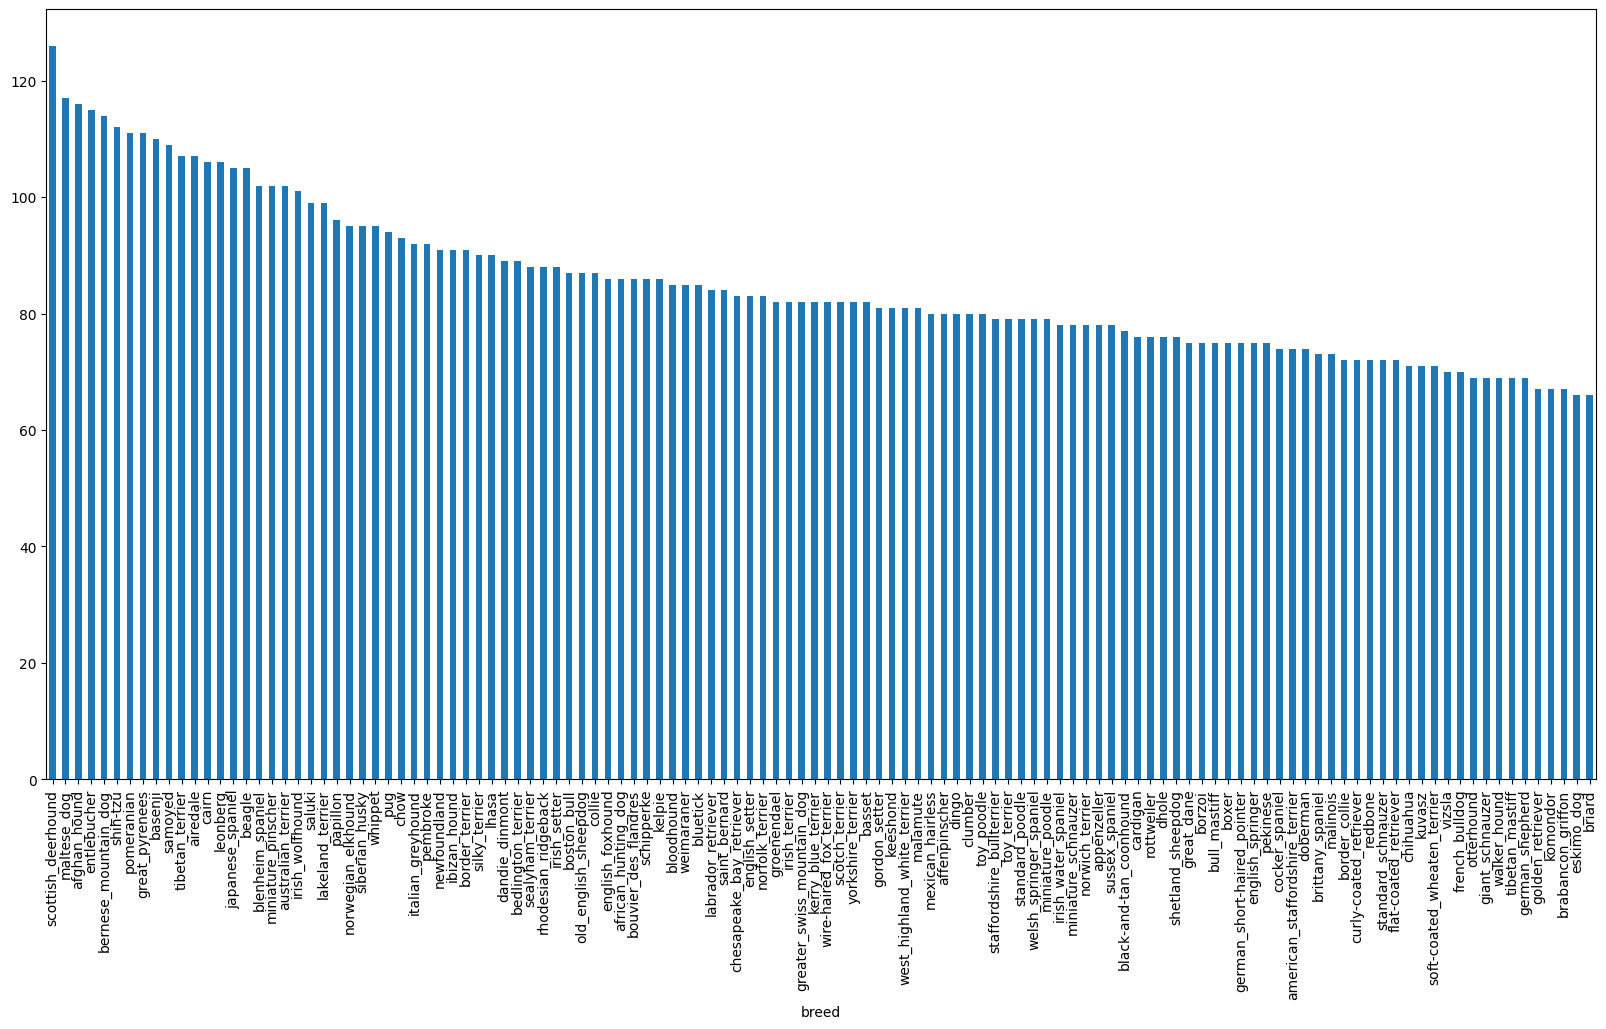

In [ ]:
#how many images are there
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10)) #skip

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

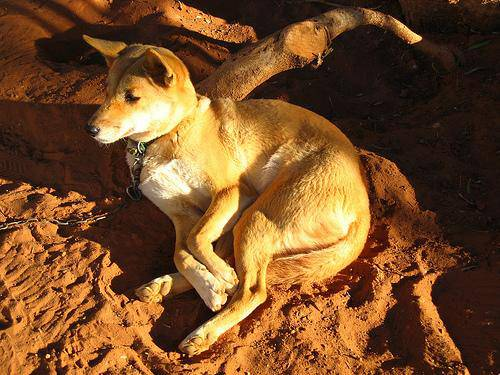

In [ ]:
#Lets view an imagew # skip
from IPython.display import Image
Image("drive/MyDrive/Dog_Breed/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")


### Getting images and thier labels
list of all our images file path names

In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
# create path names with image ID's
filename=["drive/MyDrive/Dog_Breed/train/" + fname + ".jpg" for fname in labels_csv["id"]]

filename[:10]

['drive/MyDrive/Dog_Breed/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog_Breed/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog_Breed/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog_Breed/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog_Breed/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog_Breed/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog_Breed/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog_Breed/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog_Breed/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog_Breed/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

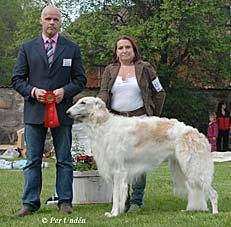

In [ ]:
Image("drive/MyDrive/Dog_Breed/train/002a283a315af96eaea0e28e7163b21b.jpg")

In [ ]:
#check whether number of filenames matches numbber of actual image files
import os
if len(os.listdir("drive/MyDrive/Dog_Breed/train"))==len(filename):
  print("filename match actual amount of files ")
else:
  print("filename does not match actual amoount of images")


filename match actual amount of files 


In [ ]:
len(os.listdir("drive/MyDrive/Dog_Breed/train/"))

10222

In [ ]:
len(filename)

10222

In [ ]:
len(os.listdir("drive/MyDrive/Dog_Breed/test/"))

10357

In [ ]:
import numpy as np
labels=labels_csv["breed"].to_numpy() # convert labels columns to numpy array
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [ ]:
len(labels)

10222

Compare the amoubnt of labesl to number of filenames

In [ ]:
# See if number of labesl matches the number of filemnames
if len(labels)==len(filename):
  print("Labels matches no.of filenames")
else:
  print("labels do not match the labels")

Labels matches no.of filenames


In [ ]:
unique_breeds=np.unique(labels)
len(unique_breeds)

120

In [ ]:
labels.dtype

dtype('O')

Turning labels into array of boolean

In [ ]:
# eg: tunring one label into boolean
print(labels[0])
labels[0]==unique_breeds # comparison operator to create coolean array

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

Now same process for the whole array

In [ ]:
boolean_labels=[label==np.array(unique_breeds) for label in labels ]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
np.where(unique_breeds=="boston_bull")

(array([19]),)

In [ ]:
#Example : Turning boolean array into integers
print(labels[0]) #original label
print(np.where(unique_breeds==labels[0]))
print(boolean_labels[0].argmax())# index where label occurs
print(boolean_labels[0].astype(int))#there will be a 1 where the sample label occurs


boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
 print(labels[3])
print(np.where(unique_breeds==labels[3]))

bluetick
(array([15]),)


### Creating our own validation set


In [ ]:
#Set up X and Y variables
X=filename
Y=boolean_labels

In [ ]:
print(len(filename))
print(len(boolean_labels))

10222
10222


We're going to start off experiment with 1000 images abd increaseas need

In [ ]:
# set no.of to use for experimenting
NUM_IMAGES=1000 #@param {type:"slider",min:1000,max:10000,step:1000}
NUM_IMAGES

1000

In [ ]:
# Lets split our data into train and validation_seet
from sklearn.model_selection import train_test_split

#Spliting them into training and validation of total size NUM_IMAGES
X_train,X_val,Y_train,Y_val=train_test_split(X[:NUM_IMAGES],
                                             Y[:NUM_IMAGES],
                                             test_size=0.2,
                                             random_state=42)

len(X_train),len(X_val),len(Y_train),len(Y_val)

(800, 200, 800, 200)

In [ ]:
print(X_train[:2],Y_train[:2])
#print("validation",X_val[:2],Y_val[:2])

['drive/MyDrive/Dog_Breed/train/00bee065dcec471f26394855c5c2f3de.jpg', 'drive/MyDrive/Dog_Breed/train/0d2f9e12a2611d911d91a339074c8154.jpg'] [array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, Fals

### Preprocessing Images (Turning images into Tensors)

To preprocess our images into Tensors we're going to write a funtion which does a few things. When we are  working with unsupervised data we hae to turn them into tensors (numerical form ).


1.   Take a image file path
2.   Use tensorflow to read the file and save it to a variable 'images'
3. Turn our image (a jpg) into tensor.
4. Resize the image to be a shape of (224,224).
5. Return the modified image.





Changing a image into numpy array

In [ ]:
from matplotlib.pyplot import imread
image=imread(filename[42])
image.shape

(257, 350, 3)

In [ ]:
image[42]

array([[46, 88, 76],
       [46, 88, 76],
       [47, 89, 79],
       ...,
       [38, 80, 58],
       [39, 78, 57],
       [39, 78, 57]], dtype=uint8)

converting the image into tensor


In [ ]:
tf.constant(image)[42]

<tf.Tensor: shape=(350, 3), dtype=uint8, numpy=
array([[46, 88, 76],
       [46, 88, 76],
       [47, 89, 79],
       ...,
       [38, 80, 58],
       [39, 78, 57],
       [39, 78, 57]], dtype=uint8)>

### Writing a function for preprocessing images

It's because this is the size of input our model (MobileV2 net ) takes, an image which is (224, 224, 3).

In [ ]:
# Defing image size
IMG_SIZE=224

#function
def process_image(image_path):
  """
  dadaTakes an image file path and turns the image into a Tensor
  """
  #Read in an image file
  image=tf.io.read_file(image_path)
  #Turn the jpg image into numerical Tensor with 3 colors channel
  image=tf.image.decode_jpeg(image,channels=3)
  #Convert the color channel valeues from 0-225 to 0-1 values
  image =tf.image.convert_image_dtype(image,tf.float32)
  #Resize the image to our desired size (224,224)
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image


## TUrning our data into batches

Trying to process 10,000+ images in one go will be stressful for a computer.

So we divide the work flow into batches
about 32 per batch, We can manually adjust the batch size.

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this:
(image,label)

In [ ]:
#create a function to return a tuple (image,label)
def get_image_label(image_path,label):
  """
  Takes an image file path name and associated label,
  processes the image and return a tuple of (image,label)
  """
  image=process_image(image_path)
  return image,label


Above function preprocesses and turns our file path names and associated labels into tuples into Tensors

But only for one batch
With below code we  will create a fucntion to make batches ()create data into batches

In [ ]:
# Define batch size ,
BATCH_SIZE=32

#create a function to tuen data into batches
def create_batches(X,Y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  #If the data is a test dataset,we probably dont have labels
  if test_data:
    print("Creating test data batches")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X))) #only filepath no labels
    data_batch=data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is vaild dataset, we dont need to shuffle it
  elif valid_data:
    print("Creating validation data batches ")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),#filepath
                                             tf.constant(Y)))#labels
    data_batch=data.map(get_image_label).batch(batch_size)
    return data_batch

  else:
    #If the data is a training dataset, we shuffle it
    print("Creating training data batches")
    #Turn filepath and label into Tensors
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                             tf.constant(Y)))

    #shuffling the pathnames and labesl before mapping image processor function is faster than shuffling after mapping
    data=data.shuffle(buffer_size=len(X))

    #Create (image,label) tuples (this also turns path into preprocessed image)
    data=data.map(get_image_label)

    #Turn the data into batches
    data_batch=data.batch(batch_size)

  return data_batch

In [ ]:
#create training and validatoin data batches
train_data=create_batches(X_train,Y_train)
val_data=create_batches(X_val,Y_val,valid_data=True)

Creating training data batches
Creating validation data batches 


In [ ]:
#Check out the different attributes of our data batches
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Our data is now in batches , lets visualize the data batches

In [ ]:
Y[0].argmax()

19

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in data batch
def show_image(image,labels):
  """
  Display 25 images from a data batch.
  """
  # Setup the figures
  plt.figure(figsize=(10,10))
  #Loop through 25 (for displaying 25 images)
  for i in range(25):
    #Create subplots (5 rows,5 cols)
    ax=plt.subplot(5,5,i+1)
    #Display an image
    plt.imshow(image[i])
    #Add the images labels as the title
    plt.title(unique_breeds[labels[i].argmax()])
    #Turn grid lines off
    plt.axis("off")


In [ ]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

Because our data is in batches, for visualizing the data we need to unbatchify the data. ie we split the data.
the "next ()" skips the None (batch) and starts with 224

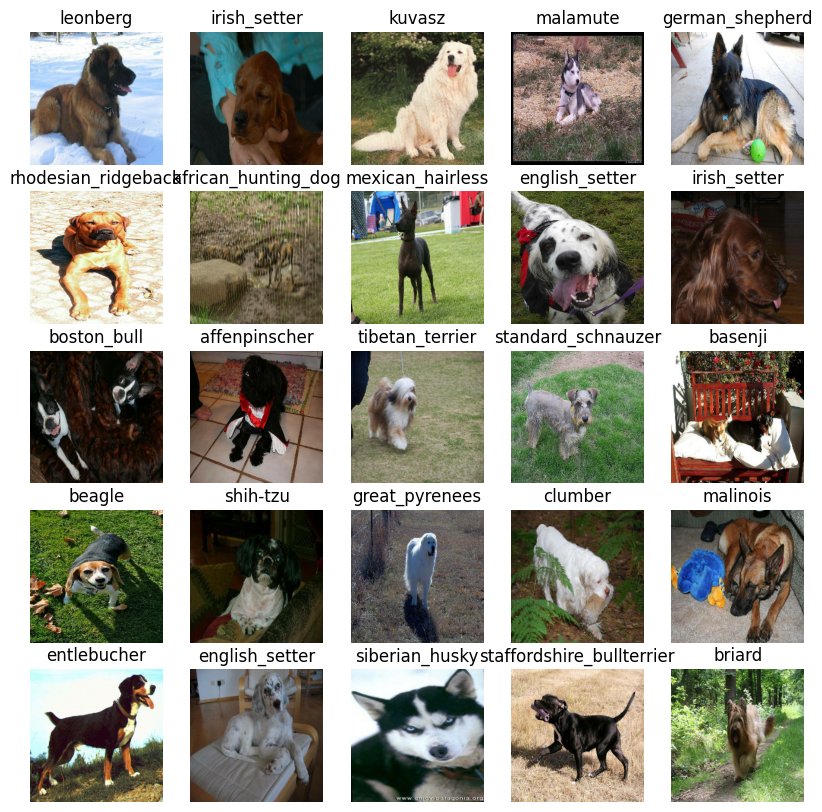

In [ ]:
#Visualize trainng images from the training data batch
train_images,train_labels = next(train_data.as_numpy_iterator())
show_image(train_images,train_labels)

Above pictures change everytime we run, Because during training data batch creation we wrote a line to shuffle the data everytime

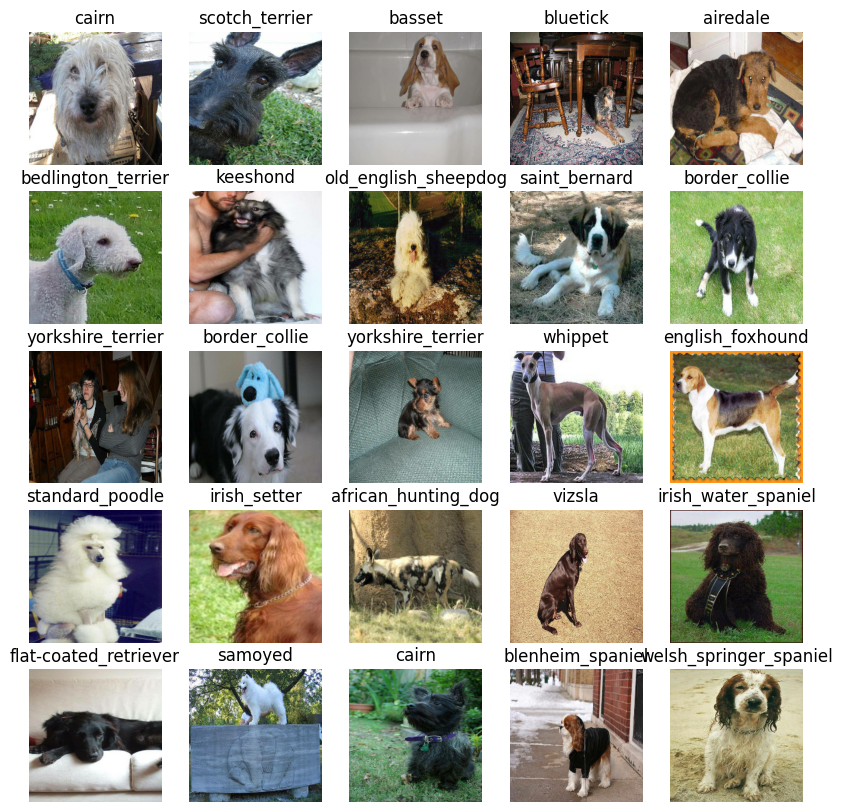

In [ ]:
# Visualize validation data batch
val_images,val_labels=next(val_data.as_numpy_iterator())
show_image(val_images,val_labels)

The validation data batch is not shuffled so every time we run this we get same pictures

##Creation of Training a model


Now our data is ready, We will be using a existing model from Tensor hub.
This proces is called transfer learning

Before Building a model we need to define few things
* Input shape (our images shape, in form of tensors )
* Output shape (image labels in form of tensors )
* URL- model we want to use

In [ ]:
# Setup input shape to the model
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]

#Setup output shape
OUTPUT_SHAPE=len(unique_breeds)

#model URL the model is MobileNet V2
MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

There are many ways to build a model in TensorFlow but one of the best way to get started is to use **Keras API**.

Creating a function which
* Takes the input shape,output shape and the model URL
*Define the layers in Kears model in a sequential fashion (do this first,then that)
*Compiles the model (says how it should be evaluated and improved).
*Builds the model(tells what kind of inout shape it will be getting )
* Return the model

When building a Deep leanring model
There are few things to consider whe n building.

**Model Layers**
Keras is an API to build a deep learning model. We can also use other API like pytorch etc.

* **keras.Sequential** - goes through each and every layer in a sequence.

* **Dense**-

is the output layer of our model. It brings all of the information discovered in the input layer together and outputs it in the shape we're after, 120 (the number of unique labels we have).
* **activation="softmax"**

parameter tells the output layer, we'd like to assign a probability value to each of the 120 labels somewhere between 0 & 1. The higher the value, the more the model believes the input image should have that label.

* If we were working on a binary classification problem, we'd use activation="sigmoid".



**Compile model**

**loss** - loss tells us about how  much  the model is predicting wrong, The lesser the value of loss the better.

**Optimizer**- Improve the models prediction. Widely used optimizer is Adam and Stochastic gradient decent

**Metrics**- Measure of the model, How well the model is performing. default-accuracy

In [ ]:
#Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print("Building model with :",model_url)

  #Setup the model layer
  model=tf.keras.Sequential([
      hub.KerasLayer(model_url), # Layer 1 (Input layer)
      tf.keras.layers.Dense(units=output_shape,
                            activation="softmax") # Layer 2 (output layer)
  ])

  #Compile model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # our model wants to reduce this (how wrong the model guesses  are )
      optimizer=tf.keras.optimizers.Adam(), # A friend telling out model how to improve it's guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  #Build the model
  model.build(input_shape) # Let model know what kind of inputs it will be getting

  return model


In [ ]:
model=create_model()
model.summary()

Building model with : https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7bb9a4629f90> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

## Creating Callbacks
We've got a model ready to go but before we train it we'll make some callbacks.

Call backs are helper function a model can use during training to do such as save a model progress,check a models progress or stop traiing early if a model stops improving .

The two callbacks we're going to add are a Tensor Board callback and early stopping callback


###TensorBoard Callback

TensorBoard helps provide a visual way to monitor the progress of your model during and after training.

It can be used directly in a notebook to track the performance measures of a model such as loss and accuracy.

To set up a TensorBoard callback and view TensorBoard in a notebook, we need to do three things:

1.Load the TensorBoard notebook extension.

2.Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function.

3.Visualize the our models training logs using the %tensorboard magic function (we'll do this later on).

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

#create a function to bild a tensor board call back
def create_callback():
  #Create a log directory for stoeing tensorboard logs
  logdir=os.path.join("drive/MyDrive/Dog_Breed/logs",
                      #Make it so the logs tracked whenever we run an experiment
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

Early Stopping Callback

Early stopping helps prevent overfitting by stopping a model when a certain evaluation metric stops improving. If a model trains for too long, it can do so well at finding patterns in a certain dataset that it's not able to use those patterns on another dataset it hasn't seen before (doesn't generalize).

It's basically like saying to our model, "keep finding patterns until the quality of those patterns starts to go down."

In [ ]:
#create early stopping (once our model improving stop training )
early_stopping =tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                 patience=3)

### Training a model (subset of data)


Our first model is only going to be trained on 1000 images. Or trained on 800 images and then validated on 200 images, meaning 1000 images total or about 10% of the total data.

We do this to make sure everything is working. And if it is, we can step it up later and train on the entire training dataset.

In [ ]:
print("GPU","available") if tf.config.list_physical_devices("GPU") else "not available :("


GPU available


In [ ]:
# How many rounds should we get the model to look through the data?
NUM_EPOCHS=100 #@param {type:"slider",min:10,max:100,step:10}

 Let's create a simple function which trains a model. The function will:

* Create a model using create_model().

* Setup a TensorBoard callback using create_tensorboard_callback() (we do this here so it creates a log directory of the current date and time).
* Call the fit() function on our model passing it the training data, validatation data, number of epochs to train for and the callbacks we'd like to use.
* Return the fitted model.

In [ ]:
#Build a fuhnction to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version
  """

  #Create a model
  model=create_model() # functoin call

  #create new tensorboard session everytime we train a model
  tensorboard=create_callback() # above function

  #Fit the model to the data passing it callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, #check validation metrics every epoch
            callbacks =[tensorboard,early_stopping]
            )
  return model


In [ ]:
#Fit the moedl to the data
model=train_model()

Building model with : https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7bb9b86f0ac0> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

## **Question** What are some methods to prevent overfitting

### Checking the tensorBoard logs


Now our model has been trained, we can make its performance visual by checking the TensorBoard logs.

The TensorBoard magic function (%tensorboard) will access the logs directory we created earlier and viualize its contents.

In [ ]:
# %tensorboard --logdir drive/MyDrive/Dog_Breed/logs/

"""
Opens a visual board which allows us to acess the graphs which show us the performace of our models
acts like a summary in a visual format
"""

'\nOpens a visual board which allows us to acess the graphs which show us the performace of our models \nacts like a summary in a visual format \n'

## Making and evaluating predictions using a trained model

Before we scale up and train on more data, let's see some other ways we can evaluate our model. Because although accuracy is a pretty good indicator of how our model is doing, it would be even better if we could could see it in action.

Making predictions with a trained model is as calling predict() on it and passing it data in the same format the model was trained on.

In [ ]:
# Make predictoins on the validatoin data (not used to train on)
prediction =model.predict(val_data,verbose=1) # verbose shows us how long there is to go
prediction


NameError: name 'model' is not defined

In [ ]:
prediction.shape

(200, 120)

In [ ]:
 # prediction  on validation
 index=69
 print(prediction[index])
 print(f"Max value (probability of prediction): {np.max(prediction[index])}") # Max predicted value of the model
 print(f"Sum : {np.sum(prediction[index])}") # sum of all the predicted values. allways close to 1 (Softmax activation)
 print(f"Max index:{np.argmax(prediction[index])}") # out of all prediction the max/Largest occures
 print(f"Predicted label: {unique_breeds[np.argmax(prediction[index])]}") #Model prediction

[1.38311496e-03 3.15366462e-02 2.16794569e-06 1.22509778e-01
 6.32639509e-04 2.13221603e-04 3.16290222e-02 1.69992403e-04
 1.18943834e-04 5.20628877e-03 2.94959136e-05 6.26362453e-04
 6.83857277e-02 1.80809002e-04 8.47784759e-05 3.36076599e-04
 3.58841171e-05 2.54077488e-03 1.30513263e-05 1.20716204e-05
 1.13319035e-03 1.34152279e-03 3.66798413e-05 2.44942494e-04
 8.03904823e-06 6.74046751e-05 5.32399390e-05 2.08503716e-05
 5.92794362e-03 1.90542032e-05 1.44214346e-05 2.99157527e-05
 1.05611351e-03 4.94866545e-05 6.85068444e-05 2.26426000e-05
 5.59024593e-05 2.90229946e-04 2.02031415e-02 3.75313306e-04
 2.40359532e-06 6.81430902e-06 1.25476465e-04 1.87161480e-04
 1.02104983e-04 1.09754455e-05 1.92474965e-02 7.44048925e-03
 4.06355970e-03 4.16820956e-04 1.12693459e-01 2.41696071e-05
 4.60082338e-05 8.37734319e-07 3.64297652e-04 1.15157345e-05
 2.47601839e-03 1.26845241e-01 5.28236596e-05 4.92153282e-04
 6.32730553e-06 4.61694544e-05 3.70801422e-06 7.39373791e-04
 1.92450374e-04 5.141866

In [ ]:
np.argmax(prediction[0])

26

Now lets build a function which performs tasks like visualizing the prediction probabilities  better, and comparing the predicted label to its true label and original image

In [ ]:
# Turn predicted probabilities into thier respective label
def get_pred_label(pred_probabilites):
  """
  Turns an array of predicted probabilities into a label
  """
  return unique_breeds[np.argmax(pred_probabilites)]


# Get predicted label based on an array of prediction probabilities
pred_label=get_pred_label(prediction[81])
pred_label


'brittany_spaniel'

Our val daata is in from of batches
So we wrote a function to unbatch it

In [ ]:
s# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (images ,label) Tensors and returns seperaet arrays of
  image and label.

  """
  images=[]
  labels=[]

  # Loop through unbatched data
  for image,label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images,labels

#Unbatchify the validation data
val_images,val_labels=unbatchify(val_data)

val_images[0],val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
get_pred_label(prediction[0])

'irish_wolfhound'

In [ ]:
val_labels[2],get_pred_label(prediction[2])

('basset', 'basset')

Now we can get
* Predicted label
* True label
* True images

Let's make some function tom make these bit more visual

The image we retireve is still in numbers so lets visuialize it

! First function we'll create will
* Take an array of prediction probabilities, an array of truth labels and array of images and a number
* Convert the prediction probabilities into predicted label
* Plot the predicted label, predicted probability and image on a single plot


In [ ]:
def plot_preD(pred_probabilites,labels,images,n):
  """
  We take prediction probabilities and get predicted labels
  compare the labels with truth labels and plot them
  """

  pred_labels=get_pred_label(prediction[n])

  #plotting thee labels
  plt.imshow(images[n])
  plt.xticks([])
  plt.yticks([])

  if pred_labels==val_labels[n]:
    color="green"
  else:
    color="red"

  plt.title("{} {:2.0f} % {}".format(pred_labels,np.argmax(prediction*100),val_labels),color=color)




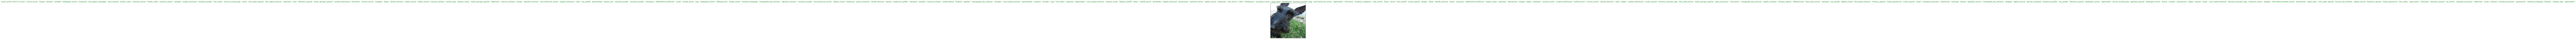

In [ ]:
plot_preD(pred_probabilites=prediction,
          labels=val_labels,
          images=val_images,
          n=1)

###Above is my own of writting the function

Below is writting the function seeing the code

In [ ]:
def plot_pred(prediction_probabilities,labels,images,n):

  pred_prob,true_label,image=prediction_probabilities[n],labels[n],images[n]

  pred_label=get_pred_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label==true_label:
    color="green"
  else:
    color="red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,np.max(pred_prob)*100,
                                      true_label),color=color)



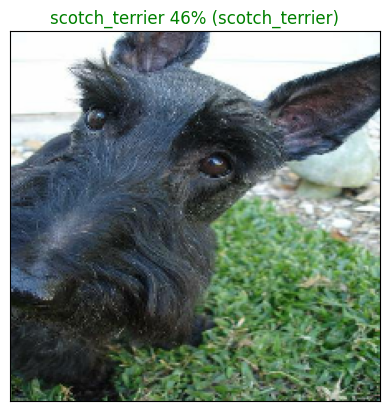

In [ ]:
plot_pred(prediction_probabilities=prediction,
          labels=val_labels,
          images=val_images,
          n=1)

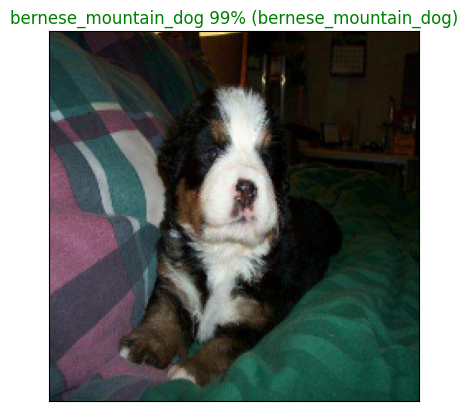

In [ ]:
plot_pred(prediction,val_labels,val_images,101)

Since we're working with a multi-class problem (120 different dog breeds), it would also be good to see what other guesses our model is making. More specifically, if our model predicts a certain label with 24% probability, what else did it predict?

Lets build a function to demonstrate. The function will:

* Take input of a prediction probabilities array,a ground truth labels array,integar
* Find predicted label
* Find top 10
 * Prediction probabilites indexex
 * Prediction probabilites values
 * Prediction labels
* Plot the top 10 prediction probabilites and labels ,coloring the true label green  

In [ ]:
def plot_pred_topn(prediction_probabilities,labels,n):
  """
  plots top 10 highest prediction confidences
  along with the truth label along with sample n
  """
  pred_prob,true_label=prediction_probabilities[n],labels[n]

  #Get the predicted label
  pred_label=get_pred_label(pred_prob)

  #Find the top 10 prediction confidence indexes
  top_10_pred_indexes=pred_prob.argsort()[-10:][::-1]
  #Findthe top 10 prediction confidence values
  top_10_pred_values=pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels=unique_breeds[top_10_pred_indexes]

  #setup plot
  top_plot=plt.bar(np.arange(len(top_10_pred_labels)),
                   top_10_pred_values,
                   color="grey")

  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  #Change color of the true label
  if np.isin(true_label,top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels==true_label)].set_color("green")
  else:
    pass

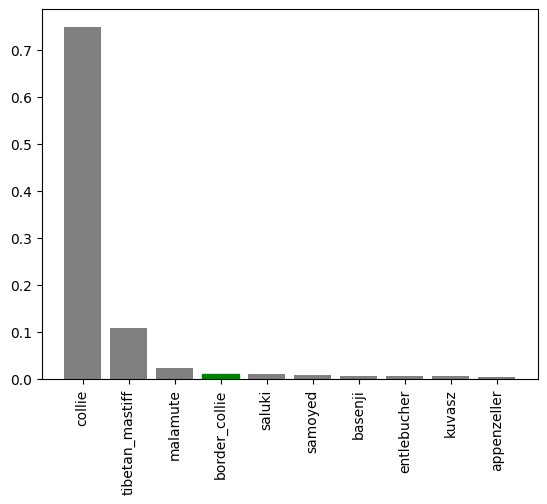

In [ ]:
plot_pred_topn(prediction_probabilities=prediction,
               labels=val_labels,
               n=9)

In [ ]:
prediction[0]

array([3.19393864e-03, 6.59375874e-05, 3.36541882e-04, 2.74573740e-05,
       5.55506500e-04, 1.74161018e-04, 2.41941810e-02, 4.86260309e-04,
       1.88409947e-04, 2.45427852e-03, 4.43000143e-04, 1.28305895e-04,
       1.46845938e-04, 6.33729869e-05, 8.25872587e-04, 6.99173470e-05,
       7.31198452e-05, 1.16546772e-01, 6.17539481e-05, 4.84339194e-04,
       9.04190529e-04, 8.22820730e-05, 1.07802625e-04, 1.49591442e-03,
       6.34823518e-05, 5.17562876e-05, 2.05331057e-01, 3.88669505e-05,
       1.90560264e-03, 4.37164621e-04, 3.42064188e-04, 4.73453460e-04,
       7.41215888e-04, 2.84557551e-04, 1.25166101e-04, 3.92615497e-02,
       9.71152986e-06, 9.83045538e-05, 6.72742681e-05, 2.31553771e-04,
       2.04207399e-03, 9.39880829e-06, 3.29506729e-05, 7.52600827e-05,
       2.95623231e-05, 8.28565899e-05, 5.89328847e-05, 1.49744665e-04,
       1.74248897e-04, 2.59953267e-05, 2.22193936e-04, 2.34194900e-04,
       4.70157363e-04, 4.41908574e-04, 1.49008585e-04, 1.21691613e-04,
      

In [ ]:
prediction[0].argsort()[-10:][::-1]

array([ 59,  26,  17,  70, 109, 103, 100,  35, 102,   6])

In [ ]:
prediction[0].max()

NameError: name 'prediction' is not defined

In [ ]:
A=np.array([28,45,8,70,9,6,78,56])
A.argsort()[-10:][::-1]

array([6, 3, 7, 1, 0, 4, 2, 5])

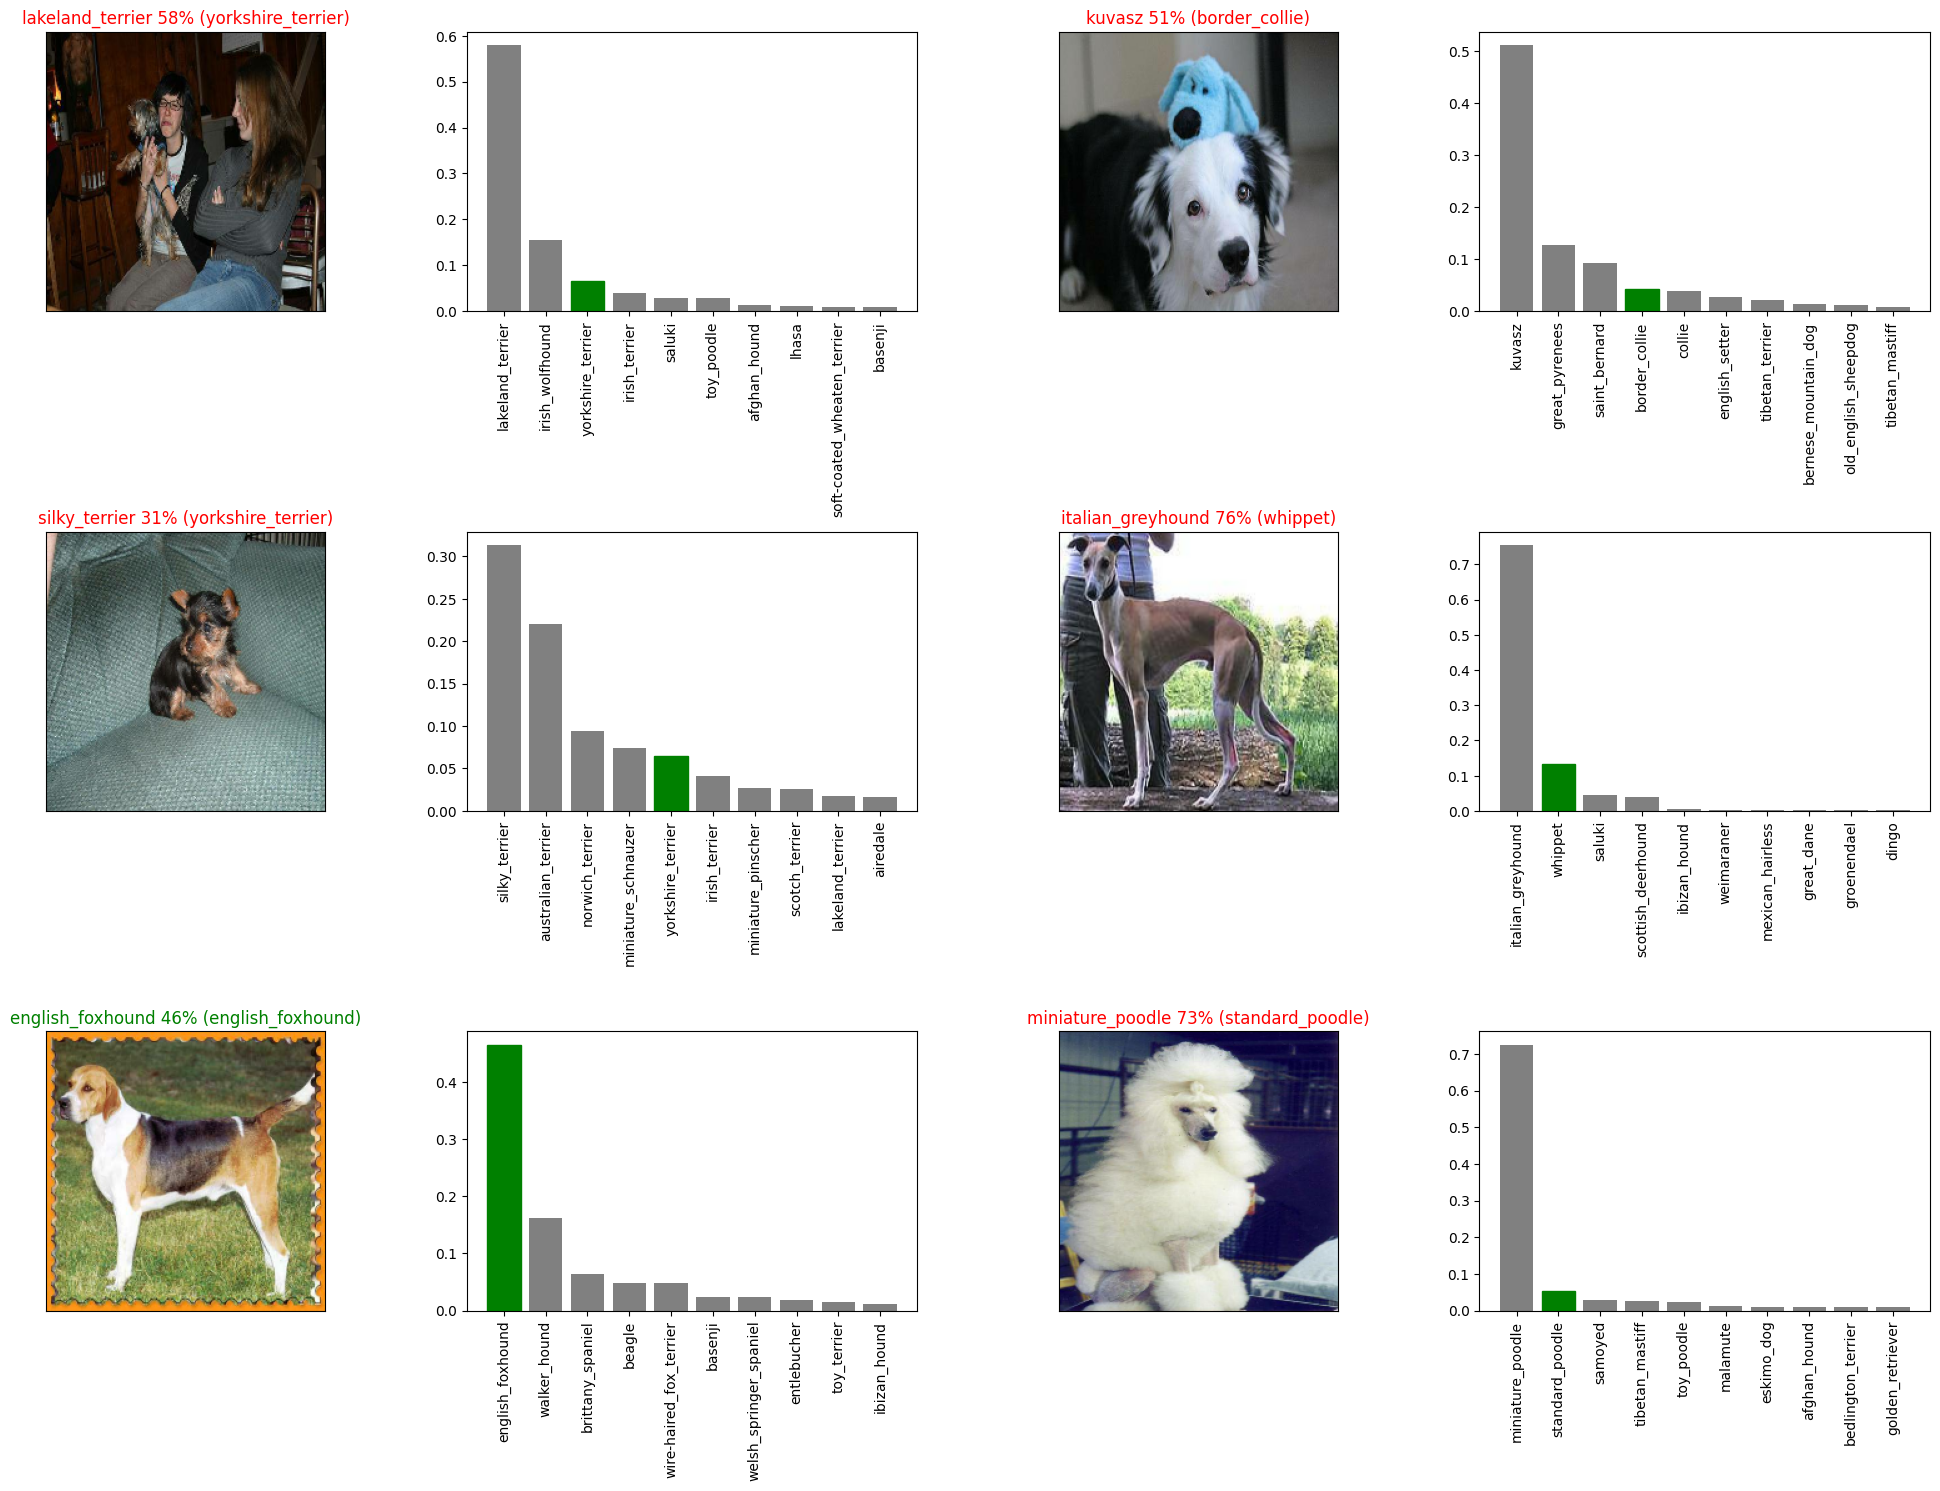

In [ ]:
#Let's check a few prediction and thier different values
i_multiplier=10
num_rows=3
num_cols=2
num_images=num_rows*num_cols
plt.figure(figsize=(5*2*num_cols,5*num_rows))
for i in range(num_images):

  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_pred(prediction_probabilities=prediction,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_pred_topn(prediction_probabilities=prediction,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout()
plt.show()



###How can we create a confusion matrix with our model prediction and true label?

In [ ]:
#Create a function to save a model
def save_model(model,suffix=None):
  """
  Saves a fiven model in a model directory and appends a suffix (string)
  """
  #Create a model directory pathname with current time
  modeldir=os.path.join("/content/drive/MyDrive/Dog_Breed/models",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path=modeldir+ "-" +suffix+ ".h5" # save format of model
  print(f"Saving model to:{model_path}..")
  model.save(model_path)
  return model_path

If we've got a saved model, we'd like to load it, let's create a function which can take a model path and use the tf.keras.models.load_model() function to load it into the notebook.

Because we're using a component from TensorFlow Hub (hub.KerasLayer) we'll have to pass this as a parameter to the custom_objects parameter.

In [ ]:
# Loading the model
def load_model(model_path):
  print(f"Load saved model from :{model_path}")
  model=tf.keras.models.load_model(model_path,
                                   custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
#Save our model trained on 1000 images
save_model(model,suffix="1000-images-Adam")

Saving model to:/content/drive/MyDrive/Dog_Breed/models/20240626-09471719395255-1000-images-Adam.h5..


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'/content/drive/MyDrive/Dog_Breed/models/20240626-09471719395255-1000-images-Adam.h5'

In [ ]:
#Load our model trained on 1000 images
model_1000_images=load_model("/content/drive/MyDrive/Dog_Breed/models/20240626-09471719395255-1000-images-Adam.h5")

Load saved model from :/content/drive/MyDrive/Dog_Breed/models/20240626-09471719395255-1000-images-Adam.h5


ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7bb99c4d85b0> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

In [ ]:
#Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 96ms/step - loss: 1.2863 - accuracy: 0.6650


[1.2862745523452759, 0.6650000214576721]

In [ ]:
#Evaluate the loaded model
model_1000_images.evaluate(val_data)

NameError: name 'model_1000_images' is not defined

### The next part of the course is training the model on complete dataset.

Till now we have been training our model on only 1000 images dataset,Next part of the course is to train on complete dataset ie.10000 images
This is take alot of time and energy,Since collab runtime issue will cause disturbance
I will not be training our model set on complete dataset.